# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
# Import the dataset
data = pd.read_csv('weight-height.csv')

# Subset the dataframe for males and females
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

# Calculate mean and standard deviation for male height and weight
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

# Calculate mean and standard deviation for female height and weight
female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

print(f"Male Height mean: {male_height_mean}")
print(f"Male Height sd: {male_height_sd}")
print(f"Male Weight mean: {male_weight_mean}")
print(f"Male Weight sd: {male_weight_sd}")
print(f"Female Height mean: {female_height_mean}")
print(f"Female Height sd: {female_height_sd}")
print(f"Female Weight mean: {female_weight_mean}")
print(f"Female Weight sd: {female_weight_sd}")

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

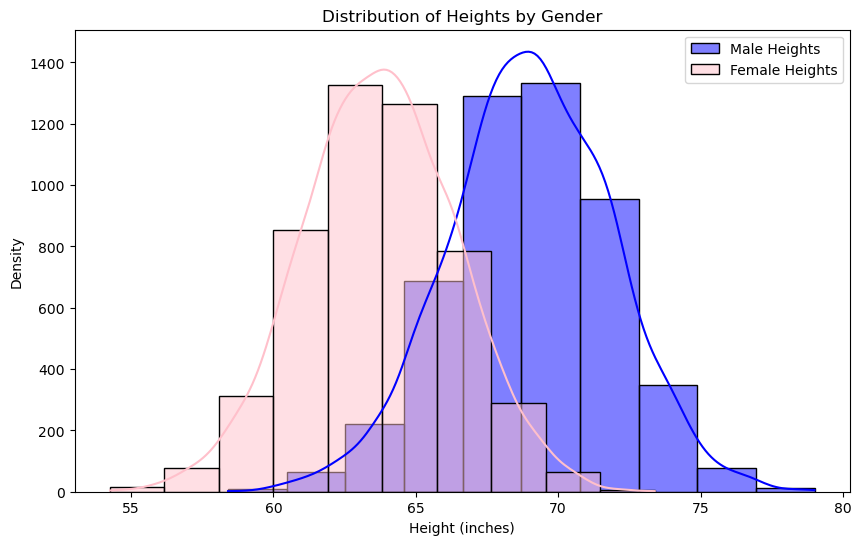

In [3]:
# Your code here
# Plot histograms for male and female heights
plt.figure(figsize=(10, 6))

sns.histplot(male_df['Height'], bins=10, color='blue', alpha=0.5, kde=True, label='Male Heights')
sns.histplot(female_df['Height'], bins=10, color='pink', alpha=0.5, kde=True, label='Female Heights')

plt.title('Distribution of Heights by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()

plt.show()

In [4]:
# Record your observations - are these inline with your personal observations?


In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

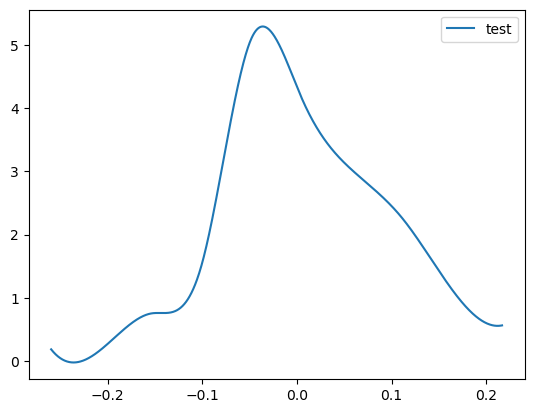

In [6]:
from scipy.interpolate import interp1d
def density(x):
    # Calculate histogram
    counts, bin_edges = np.histogram(x, bins=10, density=True)
    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Interpolate
    interpolation = interp1d(bin_centers, counts, kind='cubic', fill_value="extrapolate")
    # Generate finer x values
    x_interpolated = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
    # Generate y values using the interpolation function
    y_interpolated = interpolation(x_interpolated)
    
    return x_interpolated, y_interpolated


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

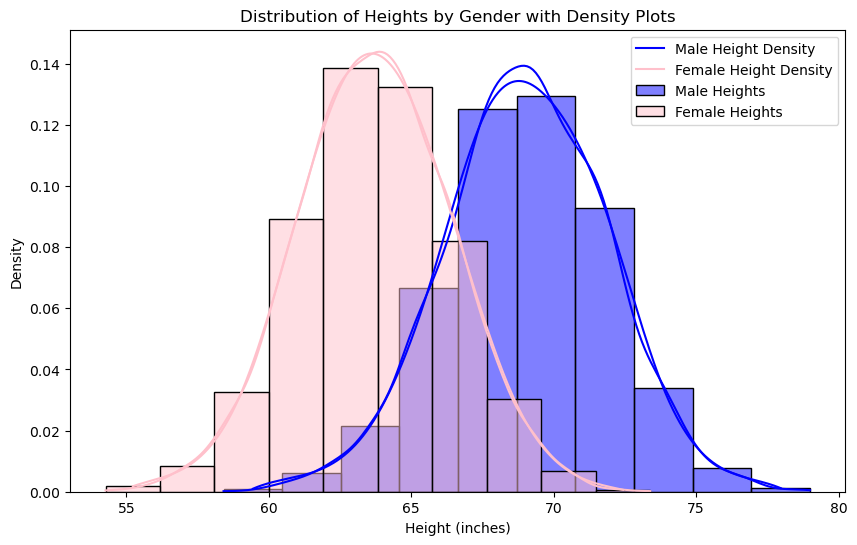

In [7]:
# Your code here 


plt.figure(figsize=(10, 6))

# Plot histograms for male and female heights with density
sns.histplot(male_df['Height'], bins=10, color='blue', alpha=0.5, kde=True, label='Male Heights', stat="density")
sns.histplot(female_df['Height'], bins=10, color='pink', alpha=0.5, kde=True, label='Female Heights', stat="density")

# Add density plots using the custom density function
x_male, y_male = density(male_df['Height'])
x_female, y_female = density(female_df['Height'])

plt.plot(x_male, y_male, color='blue', label='Male Height Density')
plt.plot(x_female, y_female, color='pink', label='Female Height Density')

plt.title('Distribution of Heights by Gender with Density Plots')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()

plt.show()

## Repeat the above exercise for male and female weights

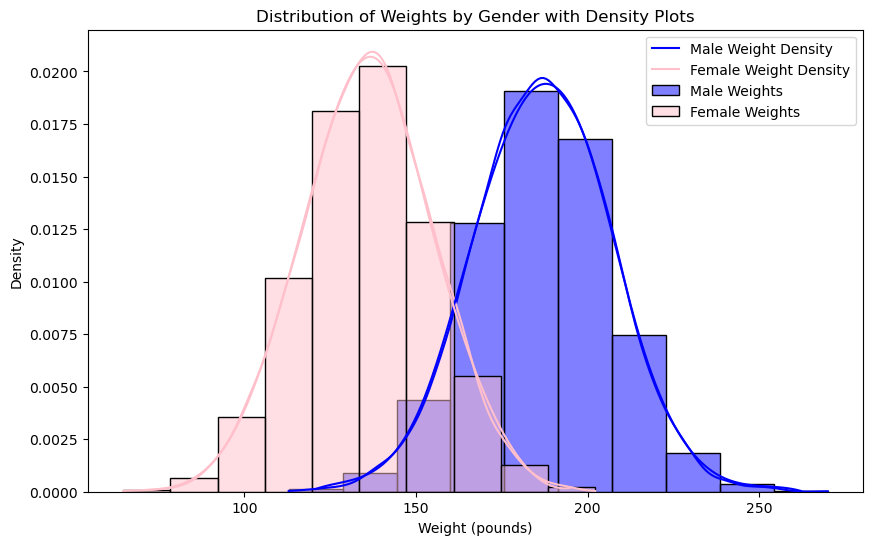

In [8]:
# Your code here 


plt.figure(figsize=(10, 6))

# Plot histograms for male and female weights with density
sns.histplot(male_df['Weight'], bins=10, color='blue', alpha=0.5, kde=True, label='Male Weights', stat="density")
sns.histplot(female_df['Weight'], bins=10, color='pink', alpha=0.5, kde=True, label='Female Weights', stat="density")

# Add density plots using the custom density function
x_male, y_male = density(male_df['Weight'])
x_female, y_female = density(female_df['Weight'])

plt.plot(x_male, y_male, color='blue', label='Male Weight Density')
plt.plot(x_female, y_female, color='pink', label='Female Weight Density')

plt.title('Distribution of Weights by Gender with Density Plots')
plt.xlabel('Weight (pounds)')
plt.ylabel('Density')
plt.legend()

plt.show()

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

In [ ]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

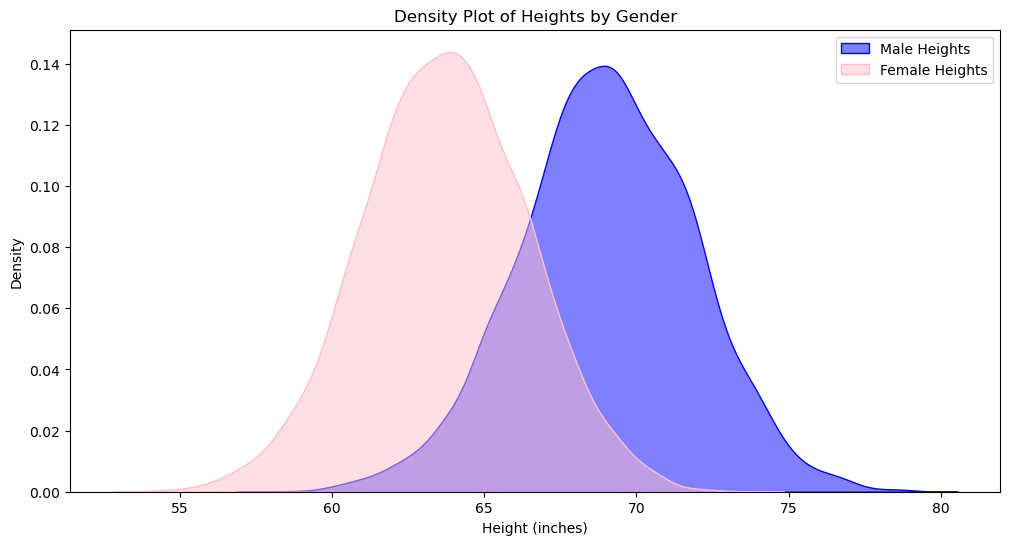

In [9]:
# Code for heights here
plt.figure(figsize=(12, 6))

# Using seaborn to plot the distribution of heights for males and females
sns.kdeplot(male_df['Height'], color='blue', label='Male Heights', fill=True, alpha=0.5)
sns.kdeplot(female_df['Height'], color='pink', label='Female Heights', fill=True, alpha=0.5)

plt.title('Density Plot of Heights by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()

plt.show()

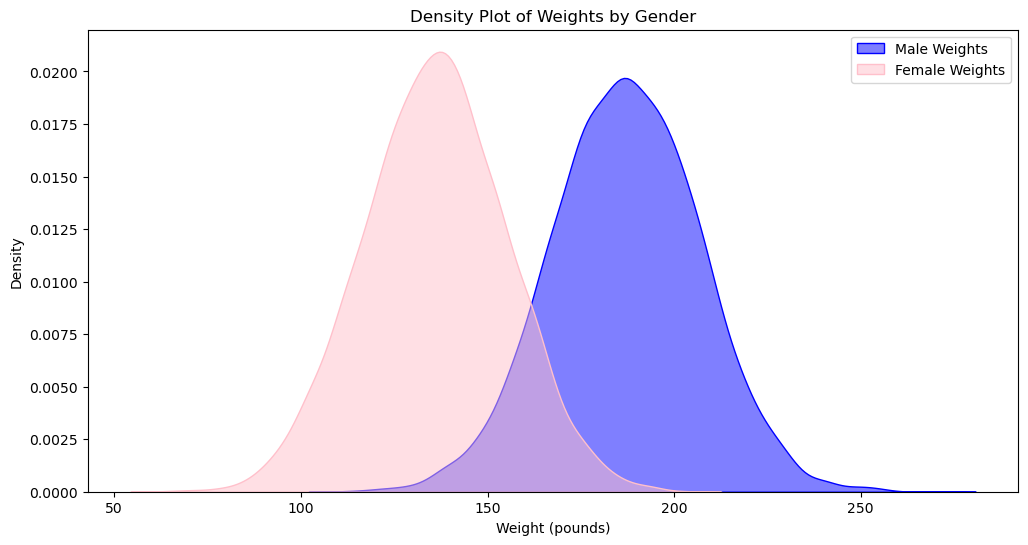

In [10]:
# Code for weights here
plt.figure(figsize=(12, 6))

# Using seaborn to plot the distribution of weights for males and females
sns.kdeplot(male_df['Weight'], color='blue', label='Male Weights', fill=True, alpha=0.5)
sns.kdeplot(female_df['Weight'], color='pink', label='Female Weights', fill=True, alpha=0.5)

plt.title('Density Plot of Weights by Gender')
plt.xlabel('Weight (pounds)')
plt.ylabel('Density')
plt.legend()

plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# The two approaches to visualizing distributions (using Matplotlib with custom density function interpolation vs. using Seaborn's kdeplot) 
# share the same goal of illustrating the underlying distribution of data points, but they differ in implementation and visual output.



In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.